<a href="https://colab.research.google.com/github/no-way02/WIDS-SENTIMENT-ANALYSIS/blob/main/WEEK_3_WEEK_4_TWITTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEEK 3

##Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:
# Importing required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
#reading file from drive
df = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/SentimentAnalysisDataset2.csv', error_bad_lines=False)

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [ ]:
#top 5 rows
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [ ]:
#NUll values in each row
df.isnull().sum()

ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

In [ ]:
#droping columns SentimentSource and ItemID

df.drop(['SentimentSource','ItemID'],axis='columns', inplace=True)

df

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!
1578608,1,"Zzzzzzz, sleep well people"
1578609,0,ZzzZzZzzzZ... wait no I have homework.
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [ ]:
#ezpanding the tezt
pd.set_option('display.max_colwidth', -1)

df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


(1578612, 2)

In [ ]:
df = df[:10000]
df.shape

(10000, 2)

In [ ]:
#punctuation library
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#function to rempove punctuation
def remove_punctuation(tezt):
  punctuationfree="".join([i for i in tezt if i not in string.punctuation])
  return punctuationfree

In [ ]:
#column for clean tezt

df['clean_tweet'] = df['SentimentText'].apply(lambda z:remove_punctuation(z))
df.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sentiment,SentimentText,clean_tweet
0,0,is so sad for my APL friend.............,is so sad for my APL friend
1,0,I missed the New Moon trailer...,I missed the New Moon trailer
2,1,omg its already 7:30 :O,omg its already 730 O
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since 11 I was suposed 2 just get a crown put on 30mins
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT
5,0,or i just worry too much?,or i just worry too much
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin
7,0,Sunny Again Work Tomorrow :-| TV Tonight,Sunny Again Work Tomorrow TV Tonight
8,1,handed in my uniform today . i miss you already,handed in my uniform today i miss you already
9,1,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number


In [ ]:
#removing urls

def remove_urls(dataframe):
#replace URL of a text
    dataframe['clean_tweet'] = dataframe['clean_tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

remove_urls(df)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Sentiment,SentimentText,clean_tweet
0,0,is so sad for my APL friend.............,is so sad for my APL friend
1,0,I missed the New Moon trailer...,I missed the New Moon trailer
2,1,omg its already 7:30 :O,omg its already 730 O
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since 11 I was suposed 2 just get a crown put on 30mins
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT


In [ ]:
#removing stop words using nltk library

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#function to remove stopwords
def remove_stopwords(tezt):
  output=' '.join([word for word in tezt.split() if word not in (stopwords)])
  return output

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda z:remove_stopwords(z))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#performing lower casing
df['clean_tweet'] = df['clean_tweet'].apply(lambda z: z.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,Sentiment,SentimentText,clean_tweet
0,0,is so sad for my APL friend.............,sad apl friend
1,0,I missed the New Moon trailer...,i missed new moon trailer
2,1,omg its already 7:30 :O,omg already 730 o
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#function to perform tokenization

import re
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens

df['token_tweet'] = df['clean_tweet'].apply(lambda z: tokenization(z))

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sentiment,SentimentText,clean_tweet,token_tweet
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]"
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]"
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]"


In [ ]:
#importing the stemming function from nltk library

from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

#definning function for stemming

def stemming(tezt):
  stem_tezt = [porter_stemmer.stem(word) for word in tezt]
  return stem_tezt

df['stem_tweet'] = df['token_tweet'].apply(lambda z:stemming(z))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# importing the lemmetizing function from nltk

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

#defining finction for lemmatization 

def lemmatizer(tezt):
  lemm_tezt = [wordnet_lemmatizer.lemmatize(word) for word in tezt]
  return lemm_tezt
  
df['lemm_tweet'] = df['token_tweet'].apply(lambda z:lemmatizer(z))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df.head()

,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]"
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]"


In [ ]:
df['l2s'] = df['lemm_tweet'].apply(lambda z:' '.join(map(str, z)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet,l2s
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",sad apl friend
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]",i missed new moon trailer
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]",omg already 730 o
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]",omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",think mi bf cheating tt


##Incorporate word2vec

In [ ]:
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import gc
import json
from keras_preprocessing.text import tokenizer_from_json
from keras.models import model_from_json

pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)

In [ ]:
documents = [_text.split() for _text in df['l2s']] 

In [ ]:
#w2v model
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)


w2v_model.build_vocab(documents)


In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 1233


In [ ]:
#trainning w2v model

%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

CPU times: user 5.59 s, sys: 114 ms, total: 5.7 s
Wall time: 3.28 s


(1454201, 2614912)

In [ ]:
w2v_model.wv.most_similar(positive=['love'],topn=10)

[('youquot', 0.8131051659584045),
 ('word', 0.7782606482505798),
 ('write', 0.7374157905578613),
 ('quotand', 0.7227964401245117),
 ('amazing', 0.7164041996002197),
 ('thank', 0.7146194577217102),
 ('lmao', 0.709814727306366),
 ('listen', 0.7065144181251526),
 ('recommend', 0.7035427093505859),
 ('quotif', 0.6844803094863892)]

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
# stop_words = stopwords.words("english")
stop_words = STOP_WORDS


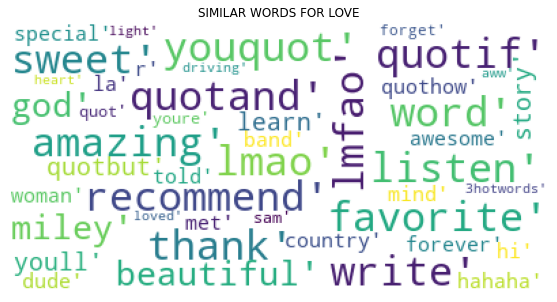

In [ ]:
#wordcloud from w2v model
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str([x[0] for x in w2v_model.wv.most_similar("love",topn=100)]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("SIMILAR WORDS FOR LOVE")
plt.show()

In [ ]:
#Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['l2s'])
vocab_size = len(tokenizer.word_index)+1
print('Vocab Size is ',vocab_size)

Vocab Size is  18985


In [ ]:
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

In [ ]:
%%time 
x= pad_sequences(tokenizer.texts_to_sequences(df['l2s']) , maxlen = SEQUENCE_LENGTH)

CPU times: user 186 ms, sys: 1.72 ms, total: 188 ms
Wall time: 193 ms


In [ ]:
y = df['Sentiment']
print(x.shape)
print(y.shape)
y = y.values.reshape(-1,1)

(10000, 300)
(10000,)


In [ ]:
#Splitting the data into training and testing
x_data, X_test, y_data, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [ ]:
#Emibedding matrix
embedding_matrix = np.zeros((vocab_size , W2V_SIZE))
for word , i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(18985, 300)


In [ ]:
#Incorporating w2v in lstm model
embedding_layer = Embedding( vocab_size , W2V_SIZE , weights = [embedding_matrix] , input_length = SEQUENCE_LENGTH, trainable = False)
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128 , dropout = 0.2 , recurrent_dropout = 0.2 ,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, dropout = 0.2 , recurrent_dropout = 0.2 ))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          5695500   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          219648    
                                                                 
 dropout (Dropout)           (None, 300, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 5,964,621
Trainable params: 269,121
Non-tr

In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]
# ReduceLRonPlateau is to reduce Learning rate when model stopeed improving
# Early Stopping to stop learning when staturation is reached.

In [ ]:
#fitting the model on our dataset
%%time
history = model.fit(x_data, y_data, batch_size = BATCH_SIZE , epochs = EPOCHS , validation_split = 0.1  , verbose = 1 , callbacks = callbacks)

Epoch 1/8
7/7 [==============================] - 128s 17s/step - loss: 0.6584 - accuracy: 0.5949 - val_loss: 0.6023 - val_accuracy: 0.6829 - lr: 0.0010
Epoch 2/8
7/7 [==============================] - 117s 16s/step - loss: 0.5949 - accuracy: 0.6949 - val_loss: 0.5788 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 3/8
7/7 [==============================] - 116s 16s/step - loss: 0.5838 - accuracy: 0.6979 - val_loss: 0.5713 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 4/8
7/7 [==============================] - 116s 16s/step - loss: 0.5773 - accuracy: 0.6986 - val_loss: 0.5669 - val_accuracy: 0.7186 - lr: 0.0010
Epoch 5/8
7/7 [==============================] - 116s 16s/step - loss: 0.5709 - accuracy: 0.7032 - val_loss: 0.5609 - val_accuracy: 0.7229 - lr: 0.0010
Epoch 6/8
7/7 [==============================] - 115s 16s/step - loss: 0.5662 - accuracy: 0.7032 - val_loss: 0.5589 - val_accuracy: 0.7186 - lr: 0.0010
Epoch 7/8
7/7 [==============================] - 116s 16s/step - loss: 0.5623 - accuracy

In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
y_validate = y_test[-validation_size:]
X_test = X_test[:-validation_size]
y_test = y_test[:-validation_size]

In [ ]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = BATCH_SIZE)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

2/2 - 6s - loss: 0.5633 - accuracy: 0.7067 - 6s/epoch - 3s/step
score: 0.56
acc: 0.71


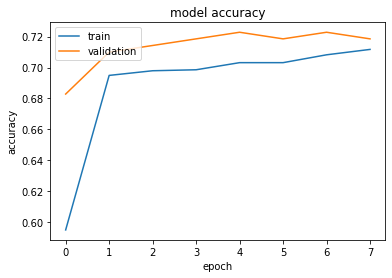

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

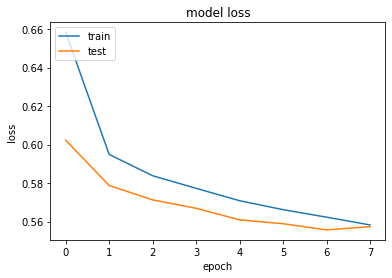

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred.flatten())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

In [ ]:
y_test = y_test.flatten()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


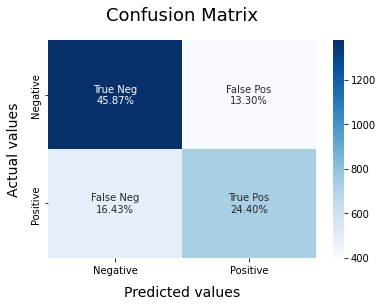

In [ ]:
ConfusionMatrix(y_pred, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       898
           1       0.64      0.60      0.62       602

    accuracy                           0.71      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.70      0.71      0.70      1500



##Logistic Regression Base Line Model

In [ ]:
from math import exp
from numpy import sign

In [ ]:
class LogReg:
    """
    Class to represent a logistic regression model.
    """

    def __init__(self, l_rate, epochs, n_features):
        """
        Create a new model with certain parameters.

        :param l_rate: Initial learning rate for model.
        :param epoch: Number of epochs to train for.
        :param n_features: Number of features.
        """
        self.l_rate = l_rate
        self.epochs = epochs
        self.coef = [0.0] * n_features
        self.bias = 0.0

    def sigmoid(self, score, threshold=20.0):
        """
        Prevent overflow of exp by capping activation at 20.

        :param score: A real valued number to convert into a number between 0 and 1
        """
        if abs(score) > threshold:
            score = threshold * sign(score)
        activation = exp(score)
        return activation / (1.0 + activation)

    def predict(self, features):
        """
        Given an example's features and the coefficients, predicts the class.

        :param features: List of real valued features for a single training example.

        :return: Returns the predicted class (either 0 or 1).
        """
        value = sum([features[i]*self.coef[i] for i in range(len(features))]) + self.bias
        return self.sigmoid(value)

    def sg_update(self, features, label):
        """
        Computes the update to the weights based on a predicted example.

        :param features: Features to train on.
        :param label: Corresponding label for features.
        """
        yhat = self.predict(features)
        e = label - yhat
        self.bias = self.bias + self.l_rate * e * yhat * (1-yhat)
        for i in range(len(features)):
            self.coef[i] = self.coef[i] + self.l_rate * e * yhat * (1-yhat) * features[i]
        return

    def train(self, X, y):
        """
        Computes logistic regression coefficients using stochastic gradient descent.

        :param X: Features to train on.
        :param y: Corresponding label for each set of features.

        :return: Returns a list of model weight coefficients where coef[0] is the bias.
        """
        for epoch in range(self.epochs):
            for features, label in zip(X, y):
                self.sg_update(features, label)
        return self.bias, self.coef


In [ ]:
def get_accuracy(y_bar, y_pred):
    """
    Computes what percent of the total testing data the model classified correctly.

    :param y_bar: List of ground truth classes for each example.
    :param y_pred: List of model predicted class for each example.

    :return: Returns a real number between 0 and 1 for the model accuracy.
    """
    correct = 0
    for i in range(len(y_bar)):
        if y_bar[i] == y_pred[i]:
            correct += 1
    accuracy = (correct / len(y_bar)) * 100.0
    return accuracy

In [ ]:
LEARNING_RATE = 0.1

In [ ]:
# Logistic Model
logreg = LogReg(LEARNING_RATE, EPOCHS, len(x_data[0]))
bias_logreg, weights_logreg = logreg.train(x_data, y_data)
y_logistic = [round(logreg.predict(example)) for example in X_test]

In [ ]:
# Compare accuracies
accuracy_logistic = get_accuracy(y_logistic, y_test)
print('Logistic Regression Accuracy: {:0.3f}'.format(accuracy_logistic))

Logistic Regression Accuracy: 59.867


#WEEK 4

##Saving the model

In [ ]:
import pickle
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(model,picklefile)

INFO:tensorflow:Assets written to: ram://d6d0a6a6-c488-48cc-b8ff-8b94e5ab87b6/assets


In [ ]:
model.save_weights('model_weights.h5')
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())
    
model.save('entire_model.h5')
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
with open('text_classifier' , 'rb') as pickelfile:
    Pmodel= pickle.load(pickelfile)

In [ ]:
def predict(text):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = Pmodel.predict([x_test])[0]

    return {"score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
print(predict('i am Happy'))

{'score': 0.32183289527893066, 'elapsed_time': 0.6173522472381592}


##vader polarity analyzer 


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [ ]:
df['scores'] = df['SentimentText'].apply(lambda tweet: sid.polarity_scores(tweet))

df.head()

,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet,l2s,scores
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",sad apl friend,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.5256}"
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]",i missed new moon trailer,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}"
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]",omg already 730 o,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.2808}"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]",omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'compound': -0.4767}"
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",think mi bf cheating tt,"{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.6679}"


In [ ]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet,l2s,scores,compound
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",sad apl friend,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.5256}",-0.5256
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]",i missed new moon trailer,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}",-0.2960
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]",omg already 730 o,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.2808}",-0.2808
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]",omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'compound': -0.4767}",-0.4767
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",think mi bf cheating tt,"{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.6679}",-0.6679


In [ ]:
df['comp_score'] = df['compound'].apply(lambda c: 1 if c >=0 else 0)

df.head()


,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet,l2s,scores,compound,comp_score
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",sad apl friend,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.5256}",-0.5256,0
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]",i missed new moon trailer,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}",-0.2960,0
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]",omg already 730 o,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.2808}",-0.2808,0
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]",omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'compound': -0.4767}",-0.4767,0
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",think mi bf cheating tt,"{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.6679}",-0.6679,0
